In [17]:
import matplotlib.pyplot as plt
import numpy as np

Формат карты - heigth и width через пробел в певрой строке, в следующей строке матрица heigth * width из 0 и 1
Например \\
2 3 \\
1 0 1 \\
0 0 0 \\

Формат входных данных для вывода соседей
((root_x, root_y), ((interval_left, interval_right), interval_row)) - текущий search_node
в каждой следующей строке записан сосед current node в формате ((root_x, root_y), ((interval_left, interval_right), interval_row))
Например \\
(1,2),((1,3),2) - current node \\
(3,2),((3,5),2) \\
(3,2),((3,4.55),3)

In [18]:
def generate_cell_from_coords(x, y):
  return [[x, x + 1, x + 1, x], [y, y, y + 1, y + 1]]

In [19]:
map_file = open("map.txt", "r")

In [20]:
class Node:
  def __init__(self, x, y) -> None:
      self.x = x
      self.y = y
  
  def __str__(self) -> str:
      return 'Node(x=' + str(self.x) + ', y=' + str(self.y) + ')'

In [21]:
def read_node(line):
  x, y = map(int, line.split())
  return Node(x, y)


In [22]:
obstacle_cells = []
expanded_obstacle_cells = []

# считываем все строки
lines = map_file.readlines()
map_height, map_width = map(int, lines[0].split())
for i in range(1, map_height + 1):
  values = list(map(int, lines[i].split()))
  for j in range(len(values)):
    if values[j] == 1:
      obstacle_cells.append(generate_cell_from_coords(j, i - 1))
    elif values[j] == 2:
      expanded_obstacle_cells.append(generate_cell_from_coords(j, i - 1))

path_nodes_number = int(lines[map_height + 1])
X = []
Y = []
for i in range (map_height + 2, len(lines)):
  x, y = map(int, lines[i].split())
  X.append(x + 0.5)
  Y.append(y + 0.5)

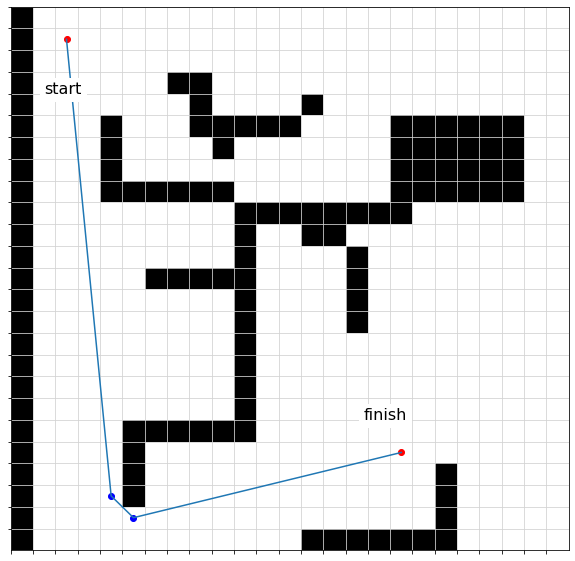

In [23]:
major_y_ticks = np.arange(0, map_height, 1)
major_x_ticks = np.arange(0, map_width, 1)
plt.annotate("start", (X[0], Y[0]), (X[0] - 1, Y[0] + 2.5), fontsize=16, backgroundcolor="w")
plt.annotate("finish", (X[-1], Y[-1]), (X[-1] - 1.7, Y[-1] - 1.5), fontsize=16, backgroundcolor="w")
plt.rc('grid', linestyle="-", color='lightgray')
plt.rcParams['figure.figsize'] = [10, 10]
plt.grid(True)
plt.xticks(major_x_ticks, labels=[])
plt.yticks(major_y_ticks, labels=[])
plt.xlim(0, map_width)
plt.ylim(0, map_height)
for cell in obstacle_cells:
  plt.fill(cell[0], cell[1], 'black')
for cell in expanded_obstacle_cells:
  plt.fill(cell[0], cell[1], 'grey', alpha=0.5)
plt.scatter(X[1:-1], Y[1:-1], marker='o', color='blue')
plt.scatter([X[0], X[-1]], [Y[0],Y[-1]], marker='o', color='red')
plt.plot(X, Y)

plt.gca().invert_yaxis()
plt.show()